<a href="https://colab.research.google.com/github/ChitranshS/DL_Lab_Sem6/blob/main/DL_Lab_2_4_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-hub
!pip install opencv-python

In [19]:
!curl -o style.jpg https://imgur.com/9ooB60I
!curl -o content.jpg https://i.imgur.com/F28w3Ac.jpg



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8435    0  8435    0     0  84014      0 --:--:-- --:--:-- --:--:-- 84350


In [7]:
import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config;np_config.enable_numpy_behavior()

In [16]:
def load_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img/255.0
    return img

In [17]:
content_image = load_img('/content/9ooB60I.jpeg')
style_1 = load_img('/content/F28w3Ac.jpg')


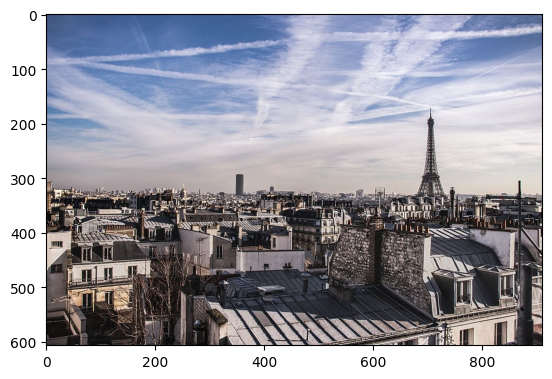

In [23]:
plt.imshow(style_1)

In [25]:
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

ListWrapper([<tf.Variable 'InceptionV3/Mixed_6c/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_mean:0' shape=(160,) dtype=float32, numpy=
array([-5.11866249e-02, -4.15960640e-01, -5.42337112e-02, -9.52912569e-01,
        1.12755015e-01, -4.91311461e-01, -9.68312547e-02,  2.76206225e-01,
       -6.91971108e-02, -7.65123405e-03, -4.38524847e-04, -3.26322585e-01,
       -6.61193490e-01, -3.14499706e-01, -1.23079263e-01,  1.56004697e-01,
       -1.74204022e-01, -3.30719858e-01,  4.64836694e-02, -1.51352556e-02,
       -3.87275338e-01, -4.55238968e-01, -4.77899522e-01, -9.70206037e-02,
       -2.51840562e-01, -3.16165477e-01, -3.09167862e-01,  5.24905980e-01,
       -1.86437607e-01, -1.02515258e-01, -2.52395034e-01, -4.77699459e-01,
        2.68790662e-01, -1.82814509e-01, -2.29982823e-01, -6.44652322e-02,
       -1.15103513e-01,  1.55370921e-01, -4.68799055e-01, -1.57561883e-01,
        1.09915137e-01, -2.55104125e-01, -1.36623085e-01, -4.15635347e-01,
       -2.40657702e-01, -3.88806820e-01, -1.